In [2]:
import pandas as pd
data_xls = pd.read_excel('fruit.xlsx', 'Date_Fruit_Datasets', dtype=str, index_col=None)
data_xls.to_csv('fruit_data.csv', encoding='utf-8', index=False)

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier
import joblib

In [72]:
df = pd.read_csv('fruit_data.csv')
df.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4,Class
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936,BERHI
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993,BERHI
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968,BERHI
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915,BERHI
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938,BERHI


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           898 non-null    int64  
 1   PERIMETER      898 non-null    float64
 2   MAJOR_AXIS     898 non-null    float64
 3   MINOR_AXIS     898 non-null    float64
 4   ECCENTRICITY   898 non-null    float64
 5   EQDIASQ        898 non-null    float64
 6   SOLIDITY       898 non-null    float64
 7   CONVEX_AREA    898 non-null    int64  
 8   EXTENT         898 non-null    float64
 9   ASPECT_RATIO   898 non-null    float64
 10  ROUNDNESS      898 non-null    float64
 11  COMPACTNESS    898 non-null    float64
 12  SHAPEFACTOR_1  898 non-null    float64
 13  SHAPEFACTOR_2  898 non-null    float64
 14  SHAPEFACTOR_3  898 non-null    float64
 15  SHAPEFACTOR_4  898 non-null    float64
 16  Class          898 non-null    object 
dtypes: float64(14), int64(2), object(1)
memory usage: 119.

In [74]:
df.shape

(898, 17)

In [75]:
df.describe()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
count,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000,898.000000
mean,298295.207127,2057.660953,750.811994,495.872785,0.737468,604.577938,0.981840,303845.592428,0.736267,2.131102,0.857720,0.807190,0.003428,0.001794,0.655420,0.988680
std,107245.205337,410.012459,144.059326,114.268917,0.088727,119.593888,0.018157,108815.656947,0.053745,17.820778,0.070839,0.062175,0.020456,0.000428,0.094314,0.020473
min,1987.000000,911.828000,336.722700,2.283200,0.344800,50.298400,0.836600,2257.000000,0.512300,1.065300,0.004800,0.041100,0.001700,0.001100,0.001700,0.756800
25%,206948.000000,1726.091500,641.068650,404.684375,0.685625,513.317075,0.978825,210022.750000,0.705875,1.373725,0.827750,0.768050,0.002200,0.001500,0.589975,0.989300
50%,319833.000000,2196.345450,791.363400,495.054850,0.754700,638.140950,0.987300,327207.000000,0.746950,1.524150,0.867750,0.804950,0.002600,0.001600,0.647950,0.993600
75%,382573.000000,2389.716575,858.633750,589.031700,0.802150,697.930525,0.991800,388804.000000,0.775850,1.674750,0.899500,0.848875,0.003200,0.002075,0.720625,0.996400
max,546063.000000,2811.997100,1222.723000,766.453600,1.000000,833.827900,0.997400,552598.000000,0.856200,535.525700,0.977300,0.968100,0.615400,0.004300,0.937300,0.999500


In [76]:
df.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

In [77]:
X = df.drop('Class', axis = 1)
y = df.Class

In [78]:
X.head()

,AREA,PERIMETER,MAJOR_AXIS,MINOR_AXIS,ECCENTRICITY,EQDIASQ,SOLIDITY,CONVEX_AREA,EXTENT,ASPECT_RATIO,ROUNDNESS,COMPACTNESS,SHAPEFACTOR_1,SHAPEFACTOR_2,SHAPEFACTOR_3,SHAPEFACTOR_4
0,422163,2378.908,837.8484,645.6693,0.6373,733.1539,0.9947,424428,0.7831,1.2976,0.9374,0.8750,0.0020,0.0015,0.7657,0.9936
1,338136,2085.144,723.8198,595.2073,0.5690,656.1464,0.9974,339014,0.7795,1.2161,0.9773,0.9065,0.0021,0.0018,0.8218,0.9993
2,526843,2647.394,940.7379,715.3638,0.6494,819.0222,0.9962,528876,0.7657,1.3150,0.9446,0.8706,0.0018,0.0014,0.7580,0.9968
3,416063,2351.210,827.9804,645.2988,0.6266,727.8378,0.9948,418255,0.7759,1.2831,0.9458,0.8791,0.0020,0.0016,0.7727,0.9915
4,347562,2160.354,763.9877,582.8359,0.6465,665.2291,0.9908,350797,0.7569,1.3108,0.9358,0.8707,0.0022,0.0017,0.7582,0.9938


In [79]:
y.head()

0    BERHI
1    BERHI
2    BERHI
3    BERHI
4    BERHI
Name: Class, dtype: object

In [80]:
y.sample(10)

430     IRAQI
754    SAFAVI
563    ROTANA
321     DOKOL
260     DOKOL
665    SAFAVI
364     DOKOL
619    SAFAVI
761    SAFAVI
587    ROTANA
Name: Class, dtype: object

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, stratify=y, random_state=42)

In [82]:
X_train.shape

(718, 16)

In [83]:
X_test.shape

(180, 16)

In [84]:
y_test.shape

(180,)

In [85]:
y_train.shape

(718,)

In [86]:
y_train.value_counts()

DOKOL     163
SAFAVI    159
ROTANA    133
DEGLET     78
SOGAY      75
IRAQI      58
BERHI      52
Name: Class, dtype: int64

In [87]:
y_test.value_counts()

DOKOL     41
SAFAVI    40
ROTANA    33
DEGLET    20
SOGAY     19
IRAQI     14
BERHI     13
Name: Class, dtype: int64

In [88]:
clf = LogisticRegression(max_iter=1200)

# One vs One Multi Classification
ovo = OneVsOneClassifier(clf)
ovo.fit(X_train,y_train)

OneVsOneClassifier(estimator=LogisticRegression(max_iter=1200))

In [89]:
# One vs Rest Multi Classification
ovr = LogisticRegression(multi_class = 'ovr', max_iter=2000)
ovr.fit(X_train, y_train)

LogisticRegression(max_iter=2000, multi_class='ovr')

In [90]:
y_pred_ovo = ovo.predict(X_test)
y_pred_ovo

array(['SAFAVI', 'DOKOL', 'SAFAVI', 'DOKOL', 'SOGAY', 'DOKOL', 'ROTANA',
       'BERHI', 'DOKOL', 'SAFAVI', 'ROTANA', 'SAFAVI', 'DOKOL', 'ROTANA',
       'SAFAVI', 'SAFAVI', 'DEGLET', 'DEGLET', 'DOKOL', 'ROTANA',
       'ROTANA', 'SOGAY', 'IRAQI', 'ROTANA', 'ROTANA', 'ROTANA', 'DOKOL',
       'DOKOL', 'SAFAVI', 'SOGAY', 'SAFAVI', 'SAFAVI', 'DOKOL', 'ROTANA',
       'SOGAY', 'DOKOL', 'SOGAY', 'SAFAVI', 'DOKOL', 'DOKOL', 'DOKOL',
       'DOKOL', 'ROTANA', 'ROTANA', 'SAFAVI', 'ROTANA', 'ROTANA', 'DOKOL',
       'ROTANA', 'DOKOL', 'DOKOL', 'DEGLET', 'SAFAVI', 'DOKOL', 'DOKOL',
       'DOKOL', 'IRAQI', 'DOKOL', 'ROTANA', 'SAFAVI', 'SOGAY', 'DOKOL',
       'BERHI', 'DOKOL', 'DEGLET', 'DOKOL', 'ROTANA', 'DOKOL', 'DOKOL',
       'ROTANA', 'ROTANA', 'DOKOL', 'ROTANA', 'ROTANA', 'ROTANA', 'IRAQI',
       'DOKOL', 'BERHI', 'SAFAVI', 'DOKOL', 'DEGLET', 'DOKOL', 'ROTANA',
       'SOGAY', 'ROTANA', 'IRAQI', 'SOGAY', 'SAFAVI', 'SAFAVI', 'ROTANA',
       'ROTANA', 'ROTANA', 'SAFAVI', 'IRAQI', 'SAFAVI'

In [91]:
y_pred_ovr = ovr.predict(X_test)
y_pred_ovr

array(['SAFAVI', 'DOKOL', 'SAFAVI', 'DOKOL', 'SAFAVI', 'DOKOL', 'ROTANA',
       'ROTANA', 'DOKOL', 'SAFAVI', 'ROTANA', 'SAFAVI', 'DOKOL', 'ROTANA',
       'SAFAVI', 'SAFAVI', 'SAFAVI', 'DEGLET', 'DOKOL', 'SAFAVI',
       'ROTANA', 'SAFAVI', 'IRAQI', 'ROTANA', 'ROTANA', 'ROTANA', 'DOKOL',
       'DOKOL', 'SAFAVI', 'ROTANA', 'SAFAVI', 'SAFAVI', 'DOKOL', 'ROTANA',
       'SOGAY', 'DOKOL', 'ROTANA', 'SAFAVI', 'DOKOL', 'DOKOL', 'DOKOL',
       'DOKOL', 'ROTANA', 'ROTANA', 'SAFAVI', 'ROTANA', 'ROTANA', 'DOKOL',
       'SAFAVI', 'DOKOL', 'DOKOL', 'DEGLET', 'SAFAVI', 'DOKOL', 'DOKOL',
       'DOKOL', 'IRAQI', 'DOKOL', 'ROTANA', 'SAFAVI', 'DEGLET', 'DOKOL',
       'ROTANA', 'DOKOL', 'DEGLET', 'DOKOL', 'ROTANA', 'DOKOL', 'DOKOL',
       'ROTANA', 'ROTANA', 'DOKOL', 'ROTANA', 'ROTANA', 'ROTANA', 'IRAQI',
       'DOKOL', 'BERHI', 'SAFAVI', 'DOKOL', 'DEGLET', 'DOKOL', 'ROTANA',
       'DEGLET', 'ROTANA', 'BERHI', 'ROTANA', 'SAFAVI', 'SAFAVI',
       'ROTANA', 'SAFAVI', 'ROTANA', 'SAFAVI', 'IRAQI',

In [92]:
y_pred_ovo_df = pd.DataFrame(y_pred_ovo, columns = ['One Vs One Prediction'])
y_pred_ovo_df.head()

,One Vs One Prediction
0,SAFAVI
1,DOKOL
2,SAFAVI
3,DOKOL
4,SOGAY


In [93]:
y_pred_ovr_df = pd.DataFrame(y_pred_ovr, columns = ['One Vs Rest Prediction'])
y_pred_ovr_df.head()

,One Vs Rest Prediction
0,SAFAVI
1,DOKOL
2,SAFAVI
3,DOKOL
4,SAFAVI


In [94]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,Class
722,SAFAVI
329,DOKOL
768,SAFAVI
291,DOKOL
665,SAFAVI


In [95]:
y_test_df = y_test_df.reset_index(drop= True)
y_test_df.head()

,Class
0,SAFAVI
1,DOKOL
2,SAFAVI
3,DOKOL
4,SAFAVI


In [96]:
result_df = pd.concat([y_pred_ovr_df,y_pred_ovo_df,y_test_df], axis = 1)
result_df

,One Vs Rest Prediction,One Vs One Prediction,Class
0,SAFAVI,SAFAVI,SAFAVI
1,DOKOL,DOKOL,DOKOL
2,SAFAVI,SAFAVI,SAFAVI
3,DOKOL,DOKOL,DOKOL
4,SAFAVI,SOGAY,SAFAVI
...,...,...,...
175,SAFAVI,SAFAVI,SAFAVI
176,DOKOL,DOKOL,DEGLET
177,IRAQI,IRAQI,BERHI
178,ROTANA,SOGAY,SAFAVI


In [97]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_ovo)

array([[ 8,  0,  0,  5,  0,  0,  0],
       [ 0, 11,  3,  0,  0,  2,  4],
       [ 0,  2, 39,  0,  0,  0,  0],
       [ 4,  0,  0,  6,  4,  0,  0],
       [ 0,  0,  0,  1, 29,  0,  3],
       [ 0,  0,  0,  0,  2, 35,  3],
       [ 0,  5,  1,  0,  2,  4,  7]], dtype=int64)

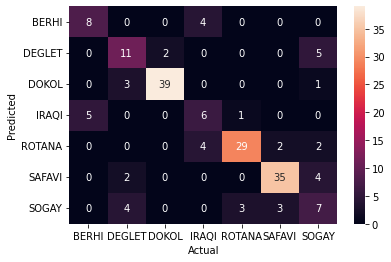

In [98]:
import seaborn as sns

data = {'y_Actual': y_test, 'y_Predicted': y_pred_ovo}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot=True)
plt.savefig('heatmap3.png')

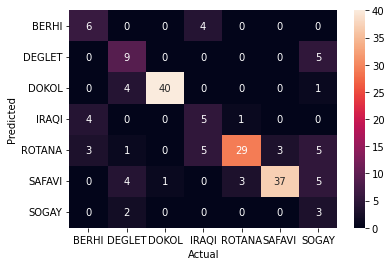

In [99]:
import seaborn as sns

data = {'y_Actual': y_test, 'y_Predicted': y_pred_ovr}

df = pd.DataFrame(data, columns = ['y_Actual','y_Predicted'])

clf_confusion_matrix = pd.crosstab(df['y_Predicted'], df['y_Actual'], rownames = ['Predicted'], colnames=['Actual'])

sns.heatmap(clf_confusion_matrix, annot=True)
plt.savefig('heatmap4.png')

In [104]:
result_df = pd.concat([y_pred_ovr_df,y_pred_ovo_df,y_test_df], axis = 1)
result_df.to_csv('Fruit Predicted Classes Using OVR and OVO Approach.csv')
result_df.head()

,One Vs Rest Prediction,One Vs One Prediction,Class
0,SAFAVI,SAFAVI,SAFAVI
1,DOKOL,DOKOL,DOKOL
2,SAFAVI,SAFAVI,SAFAVI
3,DOKOL,DOKOL,DOKOL
4,SAFAVI,SOGAY,SAFAVI


In [105]:
print("Accuracy= ",accuracy_score(y_test,y_pred_ovr)*100,"%")

Accuracy=  71.66666666666667 %


In [106]:
print("Accuracy= ",accuracy_score(y_test,y_pred_ovo)*100,"%")

Accuracy=  75.0 %


In [107]:
joblib.dump(ovo, 'fruit_one_vs_one_classifier.pkl')

['fruit_one_vs_one_classifier.pkl']